In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import collections
%matplotlib inline

In [2]:
job_df = pd.read_csv("job_trimmed.csv", index_col=0)
job_df.head()

,position,company,description,reviews,location,city,state
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303",Atlanta,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\r\nThe Emory University Department...,550.0,"Atlanta, GA",Atlanta,GA
5,Manager of Data Engineering,McKinsey & Company,Qualifications\r\nBachelor’s degree in Compute...,385.0,"Atlanta, GA 30318",Atlanta,GA
6,"Product Specialist - Periscope, New Ventures",McKinsey & Company,Qualifications\r\nBachelor’s degree\r\n5-7 yea...,385.0,"Atlanta, GA 30318",Atlanta,GA
7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,Overview / Responsibilities\r\nWood Environmen...,899.0,"Atlanta, GA",Atlanta,GA


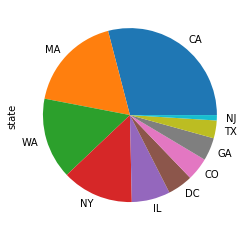

In [3]:
job_df['state'].value_counts().plot.pie()

In [4]:
job_df.loc[job_df['description'].str.contains('bioengineering', case=False)]

,position,company,description,reviews,location,city,state
36,Data Scientist,The Intersect Group,Responsibilities:Help to drive the analytical ...,29.0,"Atlanta, GA 30328",Atlanta,GA
992,Research Assistant III - Microfluidic cell bas...,Harvard University,Job Code403116 Research Assistant III Lab\r\nD...,574.0,"Boston, MA",Boston,MA
1014,Research Assistant II – Organ-on-Chip Sensing ...,Harvard University,Job Code403112 Research Assistant II Lab\r\nDu...,574.0,"Boston, MA",Boston,MA
1114,Scientist Formulation Development,Vertex Pharmaceuticals,Vertex is seeking a talented individual to joi...,179.0,"Boston, MA 02110",Boston,MA
1256,Scientist Formulation Development,Vertex,Vertex is seeking a talented individual to joi...,240.0,"Boston, MA 02114",Boston,MA
1845,Scientist (Contingent),Davis Defense Group,"Scientist – Science, Pharmaceutical, Vaccine/B...",11.0,"Washington, DC",Washington,DC
2304,"Postdoctoral Scientist - Biophysics, Bioengine...",Cedars-Sinai,Summary of Essential Job Duties:\r\nThe Tourte...,661.0,"Los Angeles, CA",Los Angeles,CA
2312,Postdoctoral Scientist - Biophysics and Bioeng...,Cedars-Sinai Medical Center,The Tourtellotte lab studies the role of growt...,661.0,"Los Angeles, CA 90048",Los Angeles,CA
2442,"Senior/Scientist, Cell Product Development",Rubius Therapeutics,Rubius Therapeutics is pioneering the creation...,3.0,"Cambridge, MA 02139",Cambridge,MA
2647,"Senior Research Associate/Research Associate, ...",Rubius Therapeutics,OverviewRubius Therapeutics is pioneering the ...,3.0,"Cambridge, MA 02139",Cambridge,MA


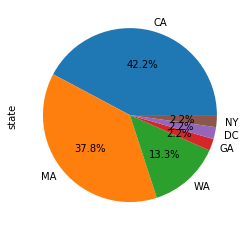

In [5]:
job_df.loc[job_df['description'].str.contains('bioengineering', case=False)]['state'].value_counts().plot.pie(autopct='%1.1f%%')

In [6]:
job_df.loc[4648]['description']

'As an Associate Integration Scientist 1 at Illumina you will work in a dynamic, team-oriented environment and help create genomic analysis\r\n\r\ntools used in the leading edge of research. You will participate in the development of high quality, robust products through the integration of\r\n\r\nhardware, software, and chemistry components. You will execute test plans in order to optimize product performance.\r\n\r\nJob Duties include but are not limited to:\r\n\r\nHands-on testing and integration of systems - hardware, software, chemistry, and application components\r\nExecute design verification test plans\r\nCollect data and prepare reports\r\nWork effectively within a cross-functional project team\r\nEducation and Experience:\r\n\r\nBSc/MS with 4+ years of experience in relevant field (Bioengineering, Chemical Engineering, Biochemistry, Analytical Chemistry, Biology, etc.)\r\nUnderstanding of sequencing systems and techniques helpful\r\nBasic wet laboratory experience\r\nProgrammi

# bring school lists

In [7]:
import json

In [8]:
with open('faculties_by_interests.json', 'r') as f:
    faculties_dic = json.load(f)

In [9]:
faculties_dic['Carnegie Mellon University']

{'Eric P. Xing': 23.1499999999923,
 'Abhinav Gupta 0001': 17.982857142849998,
 'David P. Woodruff': 17.899999999998002,
 'Tuomas Sandholm': 14.466666666663,
 'Ariel D. Procaccia': 13.076190476193,
 'Martial Hebert': 12.590909090917998,
 'Pradeep Ravikumar': 12.284523809520998,
 'Graham Neubig': 11.703968253967,
 'Barnabás Póczos': 9.919047619049,
 'Tom M. Mitchell': 9.606666666665,
 'Howie Choset': 9.199578199575,
 'Deva Ramanan': 9.058333333332,
 'Maxim Likhachev': 8.633333333333,
 'Chris Harrison': 7.533333333334001,
 'Christos Faloutsos': 7.119047619046,
 'Venkatesan Guruswami': 7.049999999993,
 'Scott E. Hudson': 7.036904761911,
 'William W. Cohen': 6.659047619042001,
 'Bernhard Haeupler': 6.2666666666660005,
 'Maria-Florina Balcan': 6.242857142855001,
 'Anupam Gupta': 6.0242424242441,
 'J. Andrew Bagnell': 5.774999999996,
 'Vipul Goyal': 5.487301587301,
 'J. Zico Kolter': 5.4833333333350005,
 'Simon Lucey': 5.4000000000010004,
 'Jaime G. Carbonell': 5.277777777774,
 'Yiming Yang':

In [10]:
faculties_dic.keys()

dict_keys(['Carnegie Mellon University', 'University of California - Berkeley', 'Massachusetts Institute of Technology', 'Stanford University', 'University of California - Los Angeles', 'Cornell University', 'University of California - San Diego', 'University of Maryland - College Park', 'Columbia University', 'University of Texas at Austin', 'University of Pennsylvania', 'Johns Hopkins University', 'University of Michigan', 'Univ. of Illinois at Urbana-Champaign', 'Rutgers University', 'Brown University', 'Georgia Institute of Technology', 'University of Washington', 'Oregon State University', 'University of California - Irvine', 'Duke University', 'University of Pittsburgh', 'University of Southern California', 'Pennsylvania State University', 'Princeton University', 'Arizona State University', 'University of California - Santa Cruz', 'Harvard University', 'University of Massachusetts Amherst', 'University of Rochester', 'University of Texas at Dallas', 'Northwestern University', 'Ne

In [15]:
pd.DataFrame(faculties_dic).T.head()

,A. Prasad Sistla,A. Robert Calderbank,Aanjhan Ranganathan,Aaron Bernstein,Aaron Clauset,Aaron F. Bobick,Aaron Roth,Aaron Schulman,Aaron Sidford,Aaron Striegel,...,Zihan Zhou,Ziv Bar-Joseph,Zizhong Chen,Zoltán Toroczkai,Zoran Popovic,Zsolt Kira,Zubair Shafiq,Zvonimir Rakamaric,Éva Tardos,Ümit V. Çatalyürek
Carnegie Mellon University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
University of California - Berkeley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Massachusetts Institute of Technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stanford University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.011905,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
University of California - Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
import difflib

In [12]:
difflib.SequenceMatcher(None, 'University of California-Berkeley', 'University of California - Berkeley').ratio()

0.9705882352941176

In [13]:
difflib.SequenceMatcher(None, 'Columbia University', 'Coleman University').ratio()

0.8648648648648649

In [14]:
difflib.SequenceMatcher(None, 'Columbia University', 'Columbia University in the City of New York').ratio()

0.6129032258064516

In [15]:
difflib.SequenceMatcher(None, 'Columbia University', 'Columbia University in the City of New York').get_matching_blocks()

[Match(a=0, b=0, size=19), Match(a=19, b=43, size=0)]

In [16]:
[a. for a in difflib.SequenceMatcher(None, 'Columbia University', 'Columbia University in the City of New York').get_matching_blocks()]

SyntaxError: invalid syntax (<ipython-input-16-90f908280be3>, line 1)

In [17]:
a = 'Columbia University'
b = 'Columbia University in the City of New York'
re.search(a, b)

<re.Match object; span=(0, 19), match='Columbia University'>

In [18]:
from pprint import pprint

In [19]:
d = difflib.Differ()
pprint(list(d.compare(a, b)))

['  C',
 '  o',
 '  l',
 '  u',
 '  m',
 '  b',
 '  i',
 '  a',
 '   ',
 '  U',
 '  n',
 '  i',
 '  v',
 '  e',
 '  r',
 '  s',
 '  i',
 '  t',
 '  y',
 '+  ',
 '+ i',
 '+ n',
 '+  ',
 '+ t',
 '+ h',
 '+ e',
 '+  ',
 '+ C',
 '+ i',
 '+ t',
 '+ y',
 '+  ',
 '+ o',
 '+ f',
 '+  ',
 '+ N',
 '+ e',
 '+ w',
 '+  ',
 '+ Y',
 '+ o',
 '+ r',
 '+ k']


In [20]:
re.search('University of Pittsburgh','University of Pittsburgh-Bradford').string

'University of Pittsburgh-Bradford'

In [21]:
re.search('University of California-Berkeley', 'University of California - Berkeley')

In [30]:
difflib.get_close_matches('Columbia University', school_df['Name'].values)

['Coleman University', 'Corban University', 'Columbus State University']

In [31]:
all([b in 'University of California-Berkeley' for b in 'University of California - Berkeley'.split(' ')])

True

In [32]:
srs = school_df['Name'].apply(lambda x: difflib.SequenceMatcher(None, 'University of California - Berkeley', x).ratio())

In [33]:
srs.idxmax()

110635

In [34]:
for uni in faculties_dic.keys():
    temp = school_df['Name'].apply(lambda x: difflib.SequenceMatcher(None, uni, x).ratio())
    uni_match = school_df.loc[temp.idxmax()]['Name']
    print(uni, ' >>> ', uni_match)

Carnegie Mellon University  >>>  Carnegie Mellon University
University of California - Berkeley  >>>  University of California-Berkeley
Massachusetts Institute of Technology  >>>  Massachusetts Institute of Technology
Stanford University  >>>  Stanford University
University of California - Los Angeles  >>>  University of California-Los Angeles
Cornell University  >>>  Cornell University
University of California - San Diego  >>>  University of California-San Diego
University of Maryland - College Park  >>>  University of Maryland-College Park
Columbia University  >>>  Coleman University
University of Texas at Austin  >>>  The University of Texas at Austin
University of Pennsylvania  >>>  University of Pennsylvania
Johns Hopkins University  >>>  Johns Hopkins University
University of Michigan  >>>  University of Michigan-Flint
Univ. of Illinois at Urbana-Champaign  >>>  University of Illinois at Urbana-Champaign
Rutgers University  >>>  Butler University
Brown University  >>>  Brown Univ

In [17]:
school_trimmed_df = school_df.dropna(subset=['Enrolled total'])

In [18]:
school_trimmed_df.loc[school_trimmed_df['Name'].apply(lambda x: 'Carnegie Mellon University' in x)]

,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
ID number,,,,,,,,,,,,,,,,,,,,,
211440,Carnegie Mellon University,2013,15213-3890,Doctor's degree - research/scholarship,Allegheny County,-79.942914,40.444616,Not applicable,Implied no,Yes,...,13.0,13.0,12.0,4.0,54.0,36.0,35.0,5.0,NaN,75155.0


In [11]:
for uni in faculties_dic.keys():
    temp = np.array([1, 0])
    uni_match1 = school_trimmed_df.loc[school_trimmed_df['Name'].apply(lambda x: True if re.search(uni, x) else False)]
    if len(uni_match1) > 1:
        uni_match = school_trimmed_df.loc[uni_match1['Graduate enrollment'].idxmax()]['Name']
        temp = np.array([0.01, 0])
    elif len(uni_match1) == 0:
        temp = school_trimmed_df['Name'].apply(lambda x: difflib.SequenceMatcher(None, uni, x).ratio())
        uni_match = school_trimmed_df.loc[temp.idxmax()]['Name']
    else:
        uni_match = uni_match1['Name'].values
    if temp.max() < 0.9:
        print('================================================================++')
    print(uni, ' >>> ', uni_match, temp.max())

NameError: name 'school_trimmed_df' is not defined

In [63]:
pitts_df = school_trimmed_df.loc[school_trimmed_df['Name'].apply(lambda x: True if re.search('University of Pittsburgh', x) else False)]
pitts_df

,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
ID number,,,,,,,,,,,,,,,,,,,,,
215266,University of Pittsburgh-Bradford,2013,16701,Bachelor's degree,McKean County,-78.673039,41.944173,Not applicable,Implied no,Implied no,...,41.0,41.0,9.0,42.0,64.0,76.0,76.0,12.0,NaN,144.0
215275,University of Pittsburgh-Greensburg,2013,15601-5860,Bachelor's degree,Westmoreland County,-79.535757,40.292824,Not applicable,Yes,Implied no,...,34.0,34.0,10.0,49.0,42.0,76.0,75.0,13.0,NaN,2585.0
215284,University of Pittsburgh-Johnstown,2013,15904,Bachelor's degree,Cambria County,-78.832611,40.268583,Not applicable,Yes,Implied no,...,30.0,30.0,12.0,45.0,49.0,75.0,75.0,13.0,NaN,11349.0
215293,University of Pittsburgh-Pittsburgh Campus,2013,15260,Doctor's degree - research/scholarship and pro...,Allegheny County,-79.954692,40.444502,Not applicable,Yes,Implied no,...,16.0,16.0,14.0,18.0,33.0,59.0,58.0,13.0,NaN,100631.0


In [64]:
pitts_df['Graduate enrollment'].idm

ID number
215266        0.0
215275        0.0
215284        0.0
215293    10034.0
Name: Graduate enrollment, dtype: float64

In [61]:
ids = school_trimmed_df['Name'].apply(lambda x: difflib.SequenceMatcher(None, 'University of North Carolina', x).ratio()).sort_values(ascending=False)[:5]
school_df.loc[ids.index]

,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
ID number,,,,,,,,,,,,,,,,,,,,,
200280,University of North Dakota,2013,58202-8193,Doctor's degree - research/scholarship and pro...,Grand Forks County,-97.070823,47.921881,Not applicable,Yes,Yes,...,22.0,21.0,15.0,23.0,48.0,63.0,61.0,18.0,1000.0,NaN
218645,University of South Carolina-Aiken,2013,29801,Master's degree,Aiken County,-81.767901,33.572917,Not applicable,Implied no,Implied no,...,49.0,49.0,6.0,82.0,27.0,62.0,61.0,3.0,157.0,NaN
199218,University of North Carolina Wilmington,2013,28403-5963,Doctor's degree - research/scholarship,New Hanover County,-77.875527,34.225223,Not applicable,Implied no,Implied no,...,21.0,21.0,1.0,27.0,43.0,54.0,53.0,4.0,5626.0,NaN
199281,University of North Carolina at Pembroke,2013,28372-1510,Master's degree,Robeson County,-79.201895,34.687231,Not applicable,Implied no,Implied no,...,59.0,59.0,5.0,74.0,10.0,73.0,73.0,0.0,3278.0,NaN
127741,University of Northern Colorado,2013,80639,Doctor's degree - research/scholarship,Weld County,-104.701721,40.403178,Not applicable,Implied no,Implied no,...,36.0,36.0,3.0,23.0,76.0,60.0,59.0,5.0,6428.0,NaN


In [60]:
school_df.loc[ids.index]['Graduate enrollment']

ID number
200280    3419.0
218645     124.0
199218    1490.0
199281     793.0
127741    2763.0
Name: Graduate enrollment, dtype: float64

In [16]:
school_df = pd.read_excel('IPEDS_data.xlsx', index_col=0)
school_df.head()

,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
ID number,,,,,,,,,,,,,,,,,,,,,
100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,Yes,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,Implied no,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


In [27]:
list(school_df.columns)

['Name',
 'year',
 'ZIP code',
 'Highest degree offered',
 'County name',
 'Longitude location of institution',
 'Latitude location of institution',
 'Religious affiliation',
 'Offers Less than one year certificate',
 'Offers One but less than two years certificate',
 "Offers Associate's degree",
 'Offers Two but less than 4 years certificate',
 "Offers Bachelor's degree",
 'Offers Postbaccalaureate certificate',
 "Offers Master's degree",
 "Offers Post-master's certificate",
 "Offers Doctor's degree - research/scholarship",
 "Offers Doctor's degree - professional practice",
 "Offers Doctor's degree - other",
 'Offers Other degree',
 'Applicants total',
 'Admissions total',
 'Enrolled total',
 'Percent of freshmen submitting SAT scores',
 'Percent of freshmen submitting ACT scores',
 'SAT Critical Reading 25th percentile score',
 'SAT Critical Reading 75th percentile score',
 'SAT Math 25th percentile score',
 'SAT Math 75th percentile score',
 'SAT Writing 25th percentile score',
 'SA

In [28]:
school_df['State abbreviation'].value_counts()

New York                122
Pennsylvania            114
California               93
Texas                    70
Ohio                     60
Massachusetts            59
Illinois                 54
Florida                  53
North Carolina           51
Michigan                 50
Indiana                  43
Georgia                  43
Virginia                 41
Missouri                 37
Tennessee                36
Wisconsin                35
Minnesota                32
South Carolina           31
Alabama                  28
Kentucky                 28
New Jersey               28
Iowa                     27
Maryland                 25
Kansas                   25
Oklahoma                 24
Washington               22
Louisiana                21
Connecticut              20
Colorado                 20
Arkansas                 20
Oregon                   19
Vermont                  19
Nebraska                 18
West Virginia            18
Maine                    17
Mississippi         

In [19]:
def get_school_info(uni):
    uni_match1 = school_trimmed_df.loc[school_trimmed_df['Name'].apply(lambda x: True if re.search(uni, x) else False)]
    if len(uni_match1) > 1:
        uni_match = school_trimmed_df.loc[uni_match1['Graduate enrollment'].idxmax()]
    elif len(uni_match1) == 0:
        temp = school_trimmed_df['Name'].apply(lambda x: difflib.SequenceMatcher(None, uni, x).ratio())
        uni_match = school_trimmed_df.loc[temp.idxmax()]
    else:
        uni_match = uni_match1.iloc[0]
    return uni_match

In [68]:
faculties_dic.keys()

dict_keys(['Carnegie Mellon University', 'University of California - Berkeley', 'Massachusetts Institute of Technology', 'Stanford University', 'University of California - Los Angeles', 'Cornell University', 'University of California - San Diego', 'University of Maryland - College Park', 'Columbia University', 'University of Texas at Austin', 'University of Pennsylvania', 'Johns Hopkins University', 'University of Michigan', 'Univ. of Illinois at Urbana-Champaign', 'Rutgers University', 'Brown University', 'Georgia Institute of Technology', 'University of Washington', 'Oregon State University', 'University of California - Irvine', 'Duke University', 'University of Pittsburgh', 'University of Southern California', 'Pennsylvania State University', 'Princeton University', 'Arizona State University', 'University of California - Santa Cruz', 'Harvard University', 'University of Massachusetts Amherst', 'University of Rochester', 'University of Texas at Dallas', 'Northwestern University', 'Ne

In [75]:
get_school_info('Carnegie Mellon University')['State abbreviation'].values[0]

'Pennsylvania'

In [90]:
li = []
for univ in faculties_dic.keys():
    li.append(get_school_info(univ)['State abbreviation'])

In [109]:
pd.DataFrame(collections.Counter(li), index=['counter']).T.sort_values(ascending=False, by=['counter'])

,counter
California,9
New York,6
Massachusetts,5
Texas,5
Pennsylvania,4
Illinois,4
North Carolina,3
Florida,2
Connecticut,2
Indiana,2


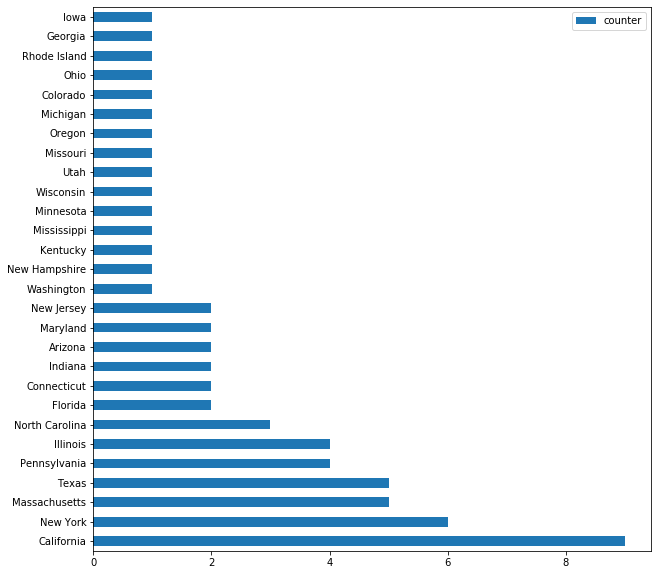

In [110]:
pd.DataFrame(collections.Counter(li), index=['counter']).T.sort_values(ascending=False, by=['counter']).plot.barh(figsize=(10,10))

In [120]:
faculties_dic.keys()

dict_keys(['Carnegie Mellon University', 'University of California - Berkeley', 'Massachusetts Institute of Technology', 'Stanford University', 'University of California - Los Angeles', 'Cornell University', 'University of California - San Diego', 'University of Maryland - College Park', 'Columbia University', 'University of Texas at Austin', 'University of Pennsylvania', 'Johns Hopkins University', 'University of Michigan', 'Univ. of Illinois at Urbana-Champaign', 'Rutgers University', 'Brown University', 'Georgia Institute of Technology', 'University of Washington', 'Oregon State University', 'University of California - Irvine', 'Duke University', 'University of Pittsburgh', 'University of Southern California', 'Pennsylvania State University', 'Princeton University', 'Arizona State University', 'University of California - Santa Cruz', 'Harvard University', 'University of Massachusetts Amherst', 'University of Rochester', 'University of Texas at Dallas', 'Northwestern University', 'Ne

In [20]:
univ_by_states = {}
for univ, dic in faculties_dic.items():
    sc_info = get_school_info(univ)
    state = sc_info['State abbreviation']
    if state not in univ_by_states:
        univ_by_states[state] = {}
    univ_by_states[state][univ] = {}
    univ_by_states[state][univ]['info'] = sc_info.to_dict()
    univ_by_states[state][univ]['faculties'] = dic

In [144]:
univ_by_states['Pennsylvania']['Carnegie Mellon University']['info']

{'Name': 'Carnegie Mellon University',
 'year': 2013,
 'ZIP code': '15213-3890',
 'Highest degree offered': "Doctor's degree - research/scholarship",
 'County name': 'Allegheny County',
 'Longitude location of institution': -79.942914,
 'Latitude location of institution': 40.444616,
 'Religious affiliation': 'Not applicable',
 'Offers Less than one year certificate': 'Implied no',
 'Offers One but less than two years certificate': 'Yes',
 "Offers Associate's degree": 'Implied no',
 'Offers Two but less than 4 years certificate': 'Yes',
 "Offers Bachelor's degree": 'Yes',
 'Offers Postbaccalaureate certificate': 'Yes',
 "Offers Master's degree": 'Yes',
 "Offers Post-master's certificate": 'Yes',
 "Offers Doctor's degree - research/scholarship": 'Yes',
 "Offers Doctor's degree - professional practice": 'Implied no',
 "Offers Doctor's degree - other": 'Implied no',
 'Offers Other degree': 'Implied no',
 'Applicants total': 18884.0,
 'Admissions total': 4813.0,
 'Enrolled total': 1442.0,
 

In [152]:
univ_by_states['Pennsylvania']['Carnegie Mellon University']['info'].values()

dict_values(['Carnegie Mellon University', 2013, '15213-3890', "Doctor's degree - research/scholarship", 'Allegheny County', -79.942914, 40.444616, 'Not applicable', 'Implied no', 'Yes', 'Implied no', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Implied no', 'Implied no', 'Implied no', 18884.0, 4813.0, 1442.0, 90.0, 34.0, 640.0, 740.0, 700.0, 790.0, 650.0, 750.0, 30.0, 34.0, 12367.0, 11279.0, 1088.0, 5917.0, 5723.0, 194.0, 1442.0, 1442.0, 0.0, 6450.0, 5556.0, 894.0, 0.0, 1374.0, 2408.0, 295.0, 0.0, 0.0, 0.0, 1.0, 1.0, 24.0, 1.0, 0.0, 1328.0, 2386.0, 295.0, 0.0, 2.0, 25.0, 25.0, 30.0, 42136.0, 44010.0, 45760.0, 47642.0, 62032.0, 62032.0, 'Pennsylvania', 'Pennsylvania', 'Mid East DE DC MD NJ NY PA', 'Private not-for-profit, 4-year or above', 'Four or more years', 'Private not-for-profit', 'No', 'No', 'City: Large', 'Research Universities (very high research activity)', 12367.0, 11279.0, 1088.0, 5917.0, 6450.0, 5723.0, 194.0, 0.0, 16.0, 3.0, 5.0, 0.0, 32.0, 2.0, 6.0, 36.0, 16.0, 37.0, 0.0, 

In [155]:
json.dumps(univ_by_states['Pennsylvania']['Carnegie Mellon University']['info'], allow_nan=False)

TypeError: Object of type int64 is not JSON serializable

In [21]:
import pickle

In [22]:
with open('univ_by_states.pickle', 'wb') as f:
    pickle.dump(univ_by_states, f)

In [23]:
with open('univ_by_states.pickle', 'rb') as f:
    data = pickle.load(f)
data.keys()

dict_keys(['Pennsylvania', 'California', 'Massachusetts', 'New York', 'Maryland', 'Texas', 'Michigan', 'Illinois', 'New Jersey', 'Rhode Island', 'Georgia', 'Washington', 'Oregon', 'North Carolina', 'Arizona', 'Indiana', 'Ohio', 'Colorado', 'Connecticut', 'Missouri', 'New Hampshire', 'Utah', 'Wisconsin', 'Minnesota', 'Mississippi', 'Florida', 'Kentucky', 'Iowa'])